In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
#from google.colab import files
#uploaded=files.upload()
data = pd.read_csv('wbcd.csv', header = 0)

In [3]:
wbcd=data
wbcd.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
wbcd.dropna(axis=1,inplace=True)

In [5]:
print("This WBCD dataset is consisted of",wbcd.shape)

This WBCD dataset is consisted of (569, 32)


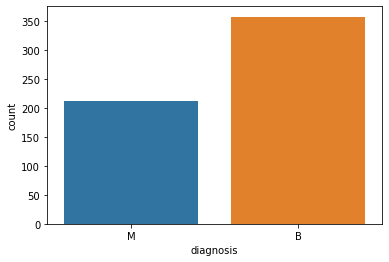

In [6]:
sns.countplot(wbcd['diagnosis'])

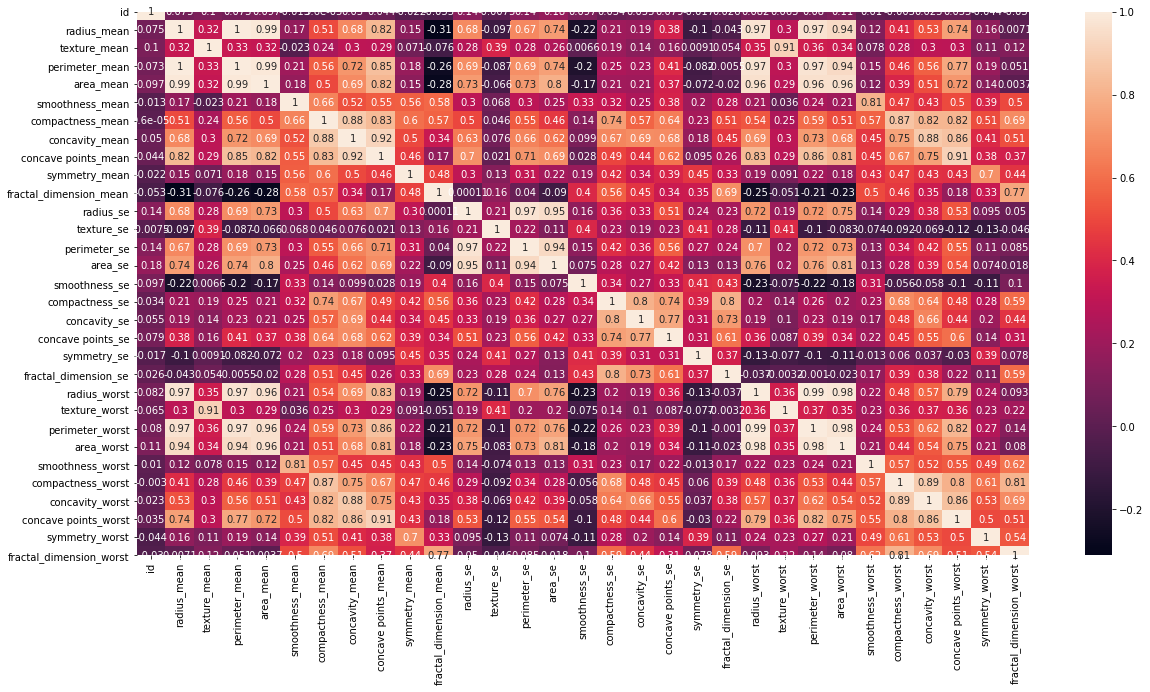

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(wbcd.corr(),annot=True)

In [8]:
Id=wbcd['id']
wbcd.drop('id',axis=1,inplace=True)
#test_X.drop('id',axis=1,inplace=True)

In [9]:
wbcd

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
x_data=wbcd.iloc[:,1:]
y_data=wbcd.iloc[:,0]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_data)
scaler.transform(x_data)

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [11]:
x1_data=x_data
y1_data=y_data

In [12]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
y_data

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [14]:
y_data=y_data.map({
    'M':0,'B':1
})


In [15]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y=train_test_split(x_data,y_data,test_size=0.25)

In [17]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [18]:
#val_y=val_y.iloc[:,0]
#val_x=val_X.iloc[:,1:]
#train_y=train_y.map({'M':0,'B':1})
#train_y

In [19]:
#val_y

In [20]:
#val_y=val_y.map({'M':0,'B':1})
#val_y

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers,models

In [23]:
model=Sequential()
#model.add(layers.Flatten())
model.add(Dense(16,input_dim=30,activation='relu'))
model.add(Dense(12))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_data,y_data,epochs=100,validation_data=(val_X, val_y))

Train on 569 samples, validate on 143 samples
Epoch 1/100
569/569 [==============================] - 5s 9ms/step - loss: 33.7798 - accuracy: 0.3726 - val_loss: 13.4337 - val_accuracy: 0.3776
Epoch 2/100
569/569 [==============================] - 0s 50us/step - loss: 9.5108 - accuracy: 0.3040 - val_loss: 5.8861 - val_accuracy: 0.2727
Epoch 3/100
569/569 [==============================] - 0s 56us/step - loss: 5.6150 - accuracy: 0.3199 - val_loss: 3.9042 - val_accuracy: 0.4406
Epoch 4/100
569/569 [==============================] - 0s 53us/step - loss: 2.3939 - accuracy: 0.4921 - val_loss: 1.0109 - val_accuracy: 0.7063
Epoch 5/100
569/569 [==============================] - 0s 49us/step - loss: 0.4796 - accuracy: 0.8366 - val_loss: 0.4043 - val_accuracy: 0.8671
Epoch 6/100
569/569 [==============================] - 0s 78us/step - loss: 0.4895 - accuracy: 0.8576 - val_loss: 0.3363 - val_accuracy: 0.8881
Epoch 7/100
569/569 [==============================] - 0s 49us/step - loss: 0.3888 - accu

569/569 [==============================] - 0s 47us/step - loss: 0.1892 - accuracy: 0.9332 - val_loss: 0.1924 - val_accuracy: 0.9371
Epoch 58/100
569/569 [==============================] - 0s 47us/step - loss: 0.1842 - accuracy: 0.9315 - val_loss: 0.1805 - val_accuracy: 0.9371
Epoch 59/100
569/569 [==============================] - 0s 49us/step - loss: 0.1781 - accuracy: 0.9262 - val_loss: 0.2670 - val_accuracy: 0.8951
Epoch 60/100
569/569 [==============================] - 0s 44us/step - loss: 0.1977 - accuracy: 0.9315 - val_loss: 0.1801 - val_accuracy: 0.9371
Epoch 61/100
569/569 [==============================] - 0s 46us/step - loss: 0.2394 - accuracy: 0.9192 - val_loss: 0.2725 - val_accuracy: 0.8951
Epoch 62/100
569/569 [==============================] - 0s 25us/step - loss: 0.2641 - accuracy: 0.8998 - val_loss: 0.2360 - val_accuracy: 0.8951
Epoch 63/100
569/569 [==============================] - 0s 62us/step - loss: 0.2134 - accuracy: 0.9104 - val_loss: 0.1696 - val_accuracy: 0.937

In [25]:
#model.save('ukcancer.model')
#history=models.load_model('ukcancer.model')

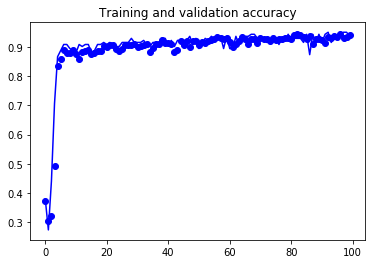

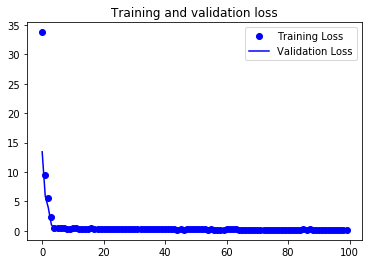

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
pred=model.predict(val_X)
pred.round()

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [28]:
from sklearn.metrics import accuracy_score
a=accuracy_score(val_y,pred.round())
print(a*100)

93.7062937062937


In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
kfold = KFold(n_splits=3, random_state=7)

In [31]:
y1_data=y_data.map({
    'M':0,'B':1
})


In [32]:
y1_data

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: diagnosis, Length: 569, dtype: float64

TypeError: estimator should be an estimator implementing 'fit' method, <keras.callbacks.callbacks.History object at 0x00000196EED3A748> was passed

# CNN MODEL